In [1]:
# import dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import linregress
from config import key_dict
gkey=key_dict["maps"]

In [2]:
# read in csv file for data
all_data = pd.read_csv("Resources/all_data.csv")

# read in csv for lat/lng
coordinates = pd.read_csv("Resources/coords.csv", encoding="Latin-1")
all_data.columns

Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [3]:
# merge all_data and coordinates
merged_group_df=all_data.merge(coordinates, how="left", left_on="Country", right_on="name")
merged_group_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,AF,33.939110,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,AF,33.939110,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,AF,33.939110,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,AF,33.939110,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,AF,33.939110,67.709953,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2015,Zimbabwe,Sub-Saharan Africa,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,ZW,-19.015438,29.154857,Zimbabwe
778,2016,Zimbabwe,Sub-Saharan Africa,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,ZW,-19.015438,29.154857,Zimbabwe
779,2017,Zimbabwe,Sub-Saharan Africa,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,ZW,-19.015438,29.154857,Zimbabwe
780,2018,Zimbabwe,Sub-Saharan Africa,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,ZW,-19.015438,29.154857,Zimbabwe


In [4]:
# check if there is null values
merged_group_df.isnull().sum()

Year                               0
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
country                            5
latitude                           1
longitude                          1
name                               1
dtype: int64

In [29]:
# find out the countries that has no coordinates
index=merged_group_df[merged_group_df["latitude"].isnull()].index.tolist()
merged_group_df.loc[index,"Country"]

Series([], Name: Country, dtype: object)

### When merge how="left", we got 8 counties without coordinates, we can either find out the coordinates for these countries or we can drop those countries by dropna or merge by inner

In [6]:
# merge inner
merged_group_df=all_data.merge(coordinates, how="inner", left_on="Country", right_on="name")
merged_group_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,AF,33.939110,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,AF,33.939110,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,AF,33.939110,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,AF,33.939110,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,AF,33.939110,67.709953,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2015,Zimbabwe,Sub-Saharan Africa,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,ZW,-19.015438,29.154857,Zimbabwe
777,2016,Zimbabwe,Sub-Saharan Africa,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,ZW,-19.015438,29.154857,Zimbabwe
778,2017,Zimbabwe,Sub-Saharan Africa,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,ZW,-19.015438,29.154857,Zimbabwe
779,2018,Zimbabwe,Sub-Saharan Africa,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,ZW,-19.015438,29.154857,Zimbabwe


In [7]:
merged_group_df.isnull().sum()

Year                               0
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
country                            4
latitude                           0
longitude                          0
name                               0
dtype: int64

In [8]:
# gather columns we need 
clean_data=merged_group_df[['Year', 'Region','Country','latitude','longitude', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',"Dystopia Residual"]]
clean_data

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Southern Asia,Afghanistan,33.939110,67.709953,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,2016,Southern Asia,Afghanistan,33.939110,67.709953,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,2017,Southern Asia,Afghanistan,33.939110,67.709953,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN
4,2019,Southern Asia,Afghanistan,33.939110,67.709953,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2015,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910
777,2016,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700
778,2017,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970
779,2018,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN


In [9]:
# group by region and country
group_df = clean_data.groupby(['Region','Country']).mean()


In [10]:
# heatmap for all the countries 
gmaps.configure(api_key=gkey)
fig=gmaps.figure()
locations=group_df[["latitude","longitude"]].astype(float)
happiness=group_df["Happiness Score"].astype(float)
heat_layer=gmaps.heatmap_layer(locations,weights=happiness,
                               dissipating=False, max_intensity=5, 
                               point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
# find the top ten countries
top_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).head(10)
top_ten=top_ten.reset_index()
top_ten


,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,2.515046
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,2.468996
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,2.625231
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,2.496242
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,2.618698
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150,2.489331
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598,2.447958
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512,2.338689
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805,2.262079
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078,2.292724


In [12]:
# mark top ten countries
coordinates=top_ten[["latitude","longitude"]].astype(float)
top_symbol=gmaps.symbol_layer(coordinates,
                           info_box_content=top_ten["Country"],
                          stroke_color="green")
fig.add_layer(top_symbol)
fig
                    

Figure(layout=FigureLayout(height='420px'))

In [13]:
botomn_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).tail(10)
botomn_ten=botomn_ten.reset_index()
botomn_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Sub-Saharan Africa,Madagascar,2017.00,-18.766947,46.869107,145.00,3.74540,0.265918,0.773236,0.434105,0.177375,0.062706,0.193293,1.862121
1,Middle East and Northern Africa,Yemen,2017.00,15.552727,48.516388,146.40,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,1.747227
2,Sub-Saharan Africa,Togo,2017.00,8.619543,0.824782,148.20,3.54420,0.265871,0.323567,0.288529,0.363747,0.100969,0.174775,1.846630
3,Southern Asia,Afghanistan,2017.00,33.939110,67.709953,149.40,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2.082827
4,Sub-Saharan Africa,Tanzania,2017.00,-6.369028,34.888822,150.80,3.46600,0.439777,0.939380,0.396732,0.386880,0.083699,0.311749,1.126537
5,Sub-Saharan Africa,Rwanda,2017.00,-1.940278,29.873888,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311,0.726224
6,Sub-Saharan Africa,South Sudan,2017.50,12.862807,30.217636,150.00,3.38250,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665,2.194429
7,Middle East and Northern Africa,Syria,2017.00,34.802075,38.996815,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.736015
8,Sub-Saharan Africa,Central African Republic,2017.25,6.611111,20.939444,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,2.394152
9,Sub-Saharan Africa,Burundi,2017.00,-3.373056,29.918886,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921,1.873361


In [14]:
# mark bottom ten countries
coordinates=botomn_ten[["latitude","longitude"]].astype(float)
markers=gmaps.symbol_layer(coordinates,
                           info_box_content=botomn_ten["Country"],
                          stroke_color="blue")
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
# group by year
year_df = clean_data.groupby('Year')
year_df["Happiness Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,157.0,5.377764,1.148389,2.839,4.51800,5.2530,6.2690,7.587
2016,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.2690,7.526
2017,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.1015,7.537
2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.1685,7.632
2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.1845,7.769


In [20]:
# year_df.head(5)

In [17]:
quartiles=year_df["Happiness Score"].astype(float).quantile([0.25,0.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]

AttributeError: 'SeriesGroupBy' object has no attribute 'astype'

In [21]:
def data(year,happiness):
    return clean_data.loc[(clean_data["Year"].astype(float)==year)
               &(clean_data["Happiness Score"].astype(float)>=happiness)]
data(2015,7.30)


,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,2015,North America,Canada,56.130366,-106.346771,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
184,2015,Western Europe,Denmark,56.263920,9.501785,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
220,2015,Western Europe,Finland,61.924110,25.748151,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
286,2015,Western Europe,Iceland,64.963051,-19.020835,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
491,2015,Western Europe,Netherlands,52.132633,5.291266,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
522,2015,Western Europe,Norway,60.472024,8.468946,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
661,2015,Western Europe,Sweden,60.128161,18.643501,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
666,2015,Western Europe,Switzerland,46.818188,8.227512,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [22]:
data(2016,7.30)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
30,2016,Australia and New Zealand,Australia,-25.274398,133.775136,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
123,2016,North America,Canada,56.130366,-106.346771,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
185,2016,Western Europe,Denmark,56.263920,9.501785,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
221,2016,Western Europe,Finland,61.924110,25.748151,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
287,2016,Western Europe,Iceland,64.963051,-19.020835,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
492,2016,Western Europe,Netherlands,52.132633,5.291266,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
497,2016,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
523,2016,Western Europe,Norway,60.472024,8.468946,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
667,2016,Western Europe,Switzerland,46.818188,8.227512,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [23]:
data(2017,7.3)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
124,2017,North America,Canada,56.130366,-106.346771,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264
186,2017,Western Europe,Denmark,56.263920,9.501785,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
222,2017,Western Europe,Finland,61.924110,25.748151,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182
288,2017,Western Europe,Iceland,64.963051,-19.020835,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
493,2017,Western Europe,Netherlands,52.132633,5.291266,6,7.377,1.503945,1.428939,0.810696,0.585384,0.282662,0.470490,2.294804
498,2017,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2.046456
524,2017,Western Europe,Norway,60.472024,8.468946,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
668,2017,Western Europe,Switzerland,46.818188,8.227512,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716


In [24]:
data(2018,3.00)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332,0.537,0.255,0.085,0.036,0.191,NaN
8,2018,Central and Eastern Europe,Albania,41.153332,20.168331,112,4.586,0.916,0.817,0.790,0.419,0.032,0.149,NaN
13,2018,Middle East and Northern Africa,Algeria,28.033886,1.659626,84,5.295,0.979,1.154,0.687,0.077,0.135,0.055,NaN
18,2018,Sub-Saharan Africa,Angola,-11.202692,17.873887,142,3.795,0.730,1.125,0.269,0.000,0.061,0.079,NaN
22,2018,Latin America and Caribbean,Argentina,-38.416097,-63.616672,29,6.388,1.073,1.468,0.744,0.570,0.054,0.062,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2018,Latin America and Caribbean,Venezuela,6.423750,-66.589730,102,4.806,0.996,1.469,0.657,0.133,0.052,0.056,NaN
764,2018,Southeastern Asia,Vietnam,14.058324,108.277199,95,5.103,0.715,1.365,0.702,0.618,0.079,0.177,NaN
769,2018,Middle East and Northern Africa,Yemen,15.552727,48.516388,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,NaN
774,2018,Sub-Saharan Africa,Zambia,-13.133897,27.849332,125,4.377,0.562,1.047,0.295,0.503,0.082,0.221,NaN


In [25]:
data(2019,6.0)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,2019,Latin America and Caribbean,Argentina,-38.416097,-63.616672,47,6.086,1.092,1.432,0.881,0.471,0.050,0.066,NaN
33,2019,Australia and New Zealand,Australia,-25.274398,133.775136,11,7.228,1.372,1.548,1.036,0.557,0.290,0.332,NaN
38,2019,Western Europe,Austria,47.516231,14.550072,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244,NaN
48,2019,Middle East and Northern Africa,Bahrain,25.930414,50.637772,37,6.199,1.362,1.368,0.871,0.536,0.110,0.255,NaN
63,2019,Western Europe,Belgium,50.503887,4.469936,18,6.923,1.356,1.504,0.986,0.473,0.210,0.160,NaN
96,2019,Latin America and Caribbean,Brazil,-14.235004,-51.925280,32,6.300,1.004,1.439,0.802,0.390,0.086,0.099,NaN
126,2019,North America,Canada,56.130366,-106.346771,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285,NaN
140,2019,Latin America and Caribbean,Chile,-35.675147,-71.542969,26,6.444,1.159,1.369,0.920,0.357,0.056,0.187,NaN
150,2019,Latin America and Caribbean,Colombia,4.570868,-74.297333,43,6.125,0.985,1.410,0.841,0.470,0.034,0.099,NaN
168,2019,Latin America and Caribbean,Costa Rica,9.748917,-83.753428,12,7.167,1.034,1.441,0.963,0.558,0.093,0.144,NaN


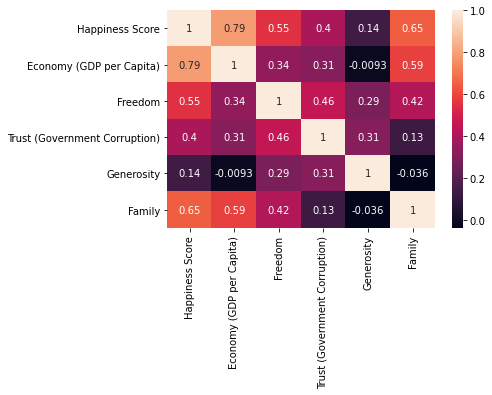

In [26]:
something_else_df = pd.DataFrame(clean_data,columns=['Happiness Score','Economy (GDP per Capita)','Freedom','Trust (Government Corruption)','Generosity', 'Family'])

corrMatrix = something_else_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

r value is: 0.7902890870561291
r squared value is: 0.62455684112001


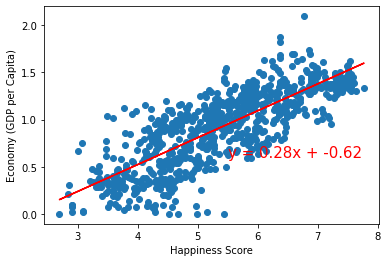

In [27]:

x_values = clean_data["Happiness Score"]
y_values = clean_data["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.48980587816079785
r squared value is: 0.23990979828087033


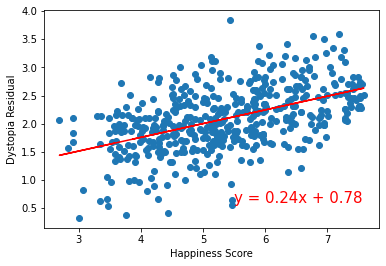

In [28]:
clean_data=clean_data.dropna()
x_values = clean_data["Happiness Score"]
y_values = clean_data["Dystopia Residual"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

In [ ]:
# find countries that have some missing data (didn't participate every year, etc)

In [ ]:
# group by region

# group by country

# group by year

In [ ]:
# create summary table with statistics

In [ ]:
# create heatmap from google maps API (weight = happiness score)

In [ ]:
# find top 5 / bottom 5 for each year

In [ ]:
# find countries with biggest change in rankings/ratings

In [ ]:
# aggregate average for each country

# scatterplot matrix (as heatmap) to see correlations for each variable

# chart GDP vs Life expectancy (or other variables for a country)

In [ ]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
all_data = pd.read_csv("./Resources/all_data.csv")
#all_data.iloc[0:10, :]
all_data.head(10)

In [ ]:
all_data.groupby("Region").mean()

In [ ]:
all_data.groupby("Country").mean()